In [1]:
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time
import math

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Collecting the number of different sectors of stocks available in the NIFTY 500
total_df = pd.read_csv('D:\Python\ind_nifty500list.csv')
industries = total_df['Industry'].unique()

In [3]:
#Making a dictionary of the stocks by sector name
companies_by_industry = {}
for industry in industries:
    companies_by_industry[industry] = total_df['Symbol'].loc[total_df['Industry'] == industry]

In [4]:
#Defining some constants
PATH = "D:\Python\Stocks_IND\\"
S_YEAR = 2021
S_MONTH = 1
S_DAY = 1
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

E_YEAR = 2023
E_MONTH = 1
E_DAY = 1
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [5]:
#Defining function to download the stock data in a given time
def save_to_csv_from_yahoo(folder, ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    try:
        print("Get data for :", ticker)
        df = pdr.get_data_yahoo(ticker, start, end)['Adj Close']
        time.sleep(5)
        df.to_csv(folder + ticker + '.csv')
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Couldn't get data for ", ticker)

In [6]:
#Downloading Data for all the companies possible in the time range in NIFTY 500
for x in total_df['Symbol']:
    save_to_csv_from_yahoo(PATH, x + ".NS", S_YEAR, S_MONTH, S_DAY, E_YEAR, E_MONTH, E_DAY)

Get data for : 360ONE.NS
[*********************100%***********************]  1 of 1 completed
Get data for : 3MINDIA.NS
[*********************100%***********************]  1 of 1 completed
Get data for : ABB.NS
[*********************100%***********************]  1 of 1 completed
Get data for : ACC.NS
[*********************100%***********************]  1 of 1 completed
Get data for : AIAENG.NS
[*********************100%***********************]  1 of 1 completed
Get data for : APLAPOLLO.NS
[*********************100%***********************]  1 of 1 completed
Get data for : AUBANK.NS
[*********************100%***********************]  1 of 1 completed
Get data for : AARTIDRUGS.NS
[*********************100%***********************]  1 of 1 completed
Get data for : AARTIIND.NS
[*********************100%***********************]  1 of 1 completed
Get data for : AAVAS.NS
[*********************100%***********************]  1 of 1 completed
Get data for : ABBOTINDIA.NS
[*********************100%**

[*********************100%***********************]  1 of 1 completed
Get data for : GODREJCP.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GODREJIND.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GODREJPROP.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GRANULES.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GRAPHITE.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GRASIM.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GESHIP.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GREENPANEL.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GRINDWELL.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GUJALKALI.NS
[*********************100%***********

[*********************100%***********************]  1 of 1 completed
Get data for : PAYTM.NS
[*********************100%***********************]  1 of 1 completed
Get data for : OFSS.NS
[*********************100%***********************]  1 of 1 completed
Get data for : ORIENTELEC.NS
[*********************100%***********************]  1 of 1 completed
Get data for : POLICYBZR.NS
[*********************100%***********************]  1 of 1 completed
Get data for : PCBL.NS
[*********************100%***********************]  1 of 1 completed
Get data for : PIIND.NS
[*********************100%***********************]  1 of 1 completed
Get data for : PNBHOUSING.NS
[*********************100%***********************]  1 of 1 completed
Get data for : PNCINFRA.NS
[*********************100%***********************]  1 of 1 completed
Get data for : PVRINOX.NS
[*********************100%***********************]  1 of 1 completed
Get data for : PAGEIND.NS
[*********************100%***********************] 

In [6]:
#Function to get the stock data in csv form to a p.DataFrame form
def get_stock_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col = 'Date', parse_dates = True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [7]:
#Function to add a new column "daily_return" to keep track of daily returns
def add_daily_returns(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col = 'Date', parse_dates = True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        df['daily_return'] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1
        df.fillna(0)
        df.to_csv(PATH + ticker + ".csv")

In [8]:
#Adding the column "daily_return" to all the df and saving in .csv format
for x in total_df['Symbol']:
    add_daily_returns(x + ".NS")

In [9]:
#Using the stock data downloaded to find the total returns in the calendar year 2022
stock_data = {}  #stores the total_return of a stock in 2022 with its industry and company(ticker)
not_found = []   #stores the names(tickers) of stocks whose total_returns cannot be determined
for industry in industries:
    stock_data[industry] = {}
    for company in companies_by_industry[industry]:
        try:
            df = pd.read_csv('D:\Python\Stocks_IND\\' + company + '.NS.csv', index_col = 'Date', parse_dates = True)
        except FileNotFoundError:
            not_found.append(company)
            print('FileNotFoundError')
            continue;
        else:
            df1 = df.loc[(df.index >= dt.datetime(2022,1,1)) & (df.index <= dt.datetime(2023,1,1))]
            try:
                df1['Adj Close'].iloc[-1]/df1['Adj Close'].iloc[0]
            except IndexError:
                not_found.append(company)
            else:
                stock_data[industry][company] = df1['Adj Close'].iloc[-1]/df1['Adj Close'].iloc[0] - 1

In [10]:
#Finding the top performing company of each sector
top_companies = []
for industry in industries:
    rois = list(stock_data[industry].values())
    companies = list(stock_data[industry].keys())
    top_companies.append(companies[rois.index(max(rois))])

In [11]:
#Function to merge a specific column of the stock data of the top performing companies
not_found = []
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    for x in tickers:
        try:
            df = pd.read_csv('D:\Python\Stocks_IND\\' + x + '.NS.csv', index_col = 'Date', parse_dates = True)
        except FileNotFoundError:
            not_found.append(company)
            print('FileNotFoundError')
            continue;
        else:
            mult_df[x] = df.loc[(df.index >= sdate) & (df.index <= edate)][col_name]
    return mult_df

In [12]:
#Making a df comprising of the Adj Close of the top stock of each sector
top_stocks_all_industries = merge_df_by_column_name('Adj Close', S_DATE_DATETIME, E_DATE_DATETIME, *top_companies)
top_stocks_all_industries

,KARURVYSYA,DCMSHRIRAM,MAZDOCK,JKLAKSHMI,RAINBOW,FACT,ADANIENT,ADANIPOWER,GESHIP,ATGL,...,BLS,KPITTECH,TVSMOTOR,METROBRAND,TEJASNET,SWANENERGY,JKPAPER,RVNL,RAYMOND,SUNTV
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,43.951267,380.518799,211.858093,336.876099,NaN,60.650002,490.615631,50.150002,245.406372,376.693268,...,21.022238,142.253647,482.565918,NaN,138.649994,135.441162,109.441467,21.042892,341.816528,446.195618
2021-01-04,45.242538,379.511749,211.532394,339.778046,NaN,61.349998,493.961975,50.200001,253.158920,375.493622,...,22.134523,143.785904,487.187500,NaN,137.050003,133.643280,117.660400,21.174959,346.201996,462.237762
2021-01-05,46.103397,376.826263,209.717667,336.335022,NaN,63.750000,493.862122,49.799999,255.697769,373.544159,...,23.419834,142.451370,483.500000,NaN,139.050003,132.194977,123.716438,24.124489,347.049194,458.833496
2021-01-06,45.625141,373.805115,204.087341,336.089111,NaN,62.000000,490.365906,50.700001,252.977554,369.295349,...,23.296247,134.839447,480.009216,NaN,136.300003,132.344803,120.496155,24.740807,345.753448,454.216675
2021-01-07,46.007744,372.510376,205.017960,340.220734,NaN,63.349998,517.536255,51.000000,252.161530,368.095734,...,27.955496,133.752045,490.973267,NaN,136.550003,133.493439,124.004822,25.577240,348.843231,483.176483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,108.650002,834.459473,804.150024,796.200012,704.000000,267.299988,3716.750000,275.299988,648.517578,3311.699951,...,174.037827,688.027100,1010.563721,833.334839,560.549988,286.649994,389.074768,62.200680,1451.250000,487.214966
2022-12-27,109.050003,851.990967,821.750000,802.650024,719.200012,294.000000,3769.649902,289.049988,663.535889,3352.899902,...,173.688843,695.713440,1038.923828,839.664978,577.000000,280.100006,399.122131,62.054211,1420.199951,481.791077
2022-12-28,108.250000,859.142639,799.650024,798.950012,740.500000,323.399994,3797.699951,303.500000,643.105164,3605.800049,...,170.597946,698.757996,1077.383911,858.156921,578.750000,285.200012,403.774597,65.130066,1442.150024,478.142242


<AxesSubplot:xlabel='Date'>

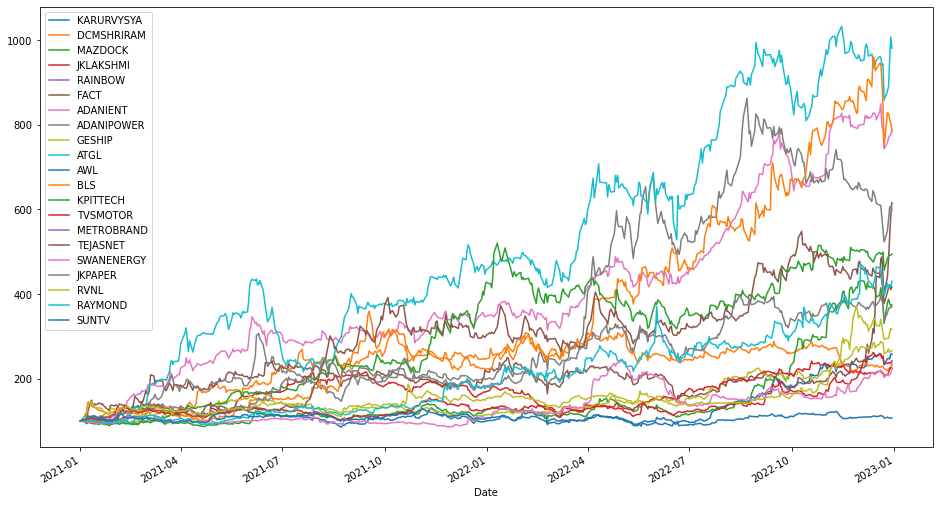

In [13]:
#plotting the Adj Close of each of the top stocks
(top_stocks_all_industries/top_stocks_all_industries.iloc[0]*100).plot(figsize = (16, 9))

In [14]:
#Making a list of net returns of each stock indexed by ticker
returns = np.log(top_stocks_all_industries/top_stocks_all_industries.shift(1))
mean_return = returns.mean()*248*2
mean_return

KARURVYSYA    0.948428
DCMSHRIRAM    0.854622
MAZDOCK       1.322763
JKLAKSHMI     0.886916
RAINBOW       1.528541
FACT          1.821068
ADANIENT      2.066500
ADANIPOWER    1.790873
GESHIP        0.982588
ATGL          2.287334
AWL           1.863357
BLS           2.063403
KPITTECH      1.600974
TVSMOTOR      0.807292
METROBRAND    1.140527
TEJASNET      1.431112
SWANENERGY    0.816531
JKPAPER       1.311048
RVNL          1.155125
RAYMOND       1.462168
SUNTV         0.073004
dtype: float64

In [15]:
#the correlation matrix of the stock returns
returns.corr()

,KARURVYSYA,DCMSHRIRAM,MAZDOCK,JKLAKSHMI,RAINBOW,FACT,ADANIENT,ADANIPOWER,GESHIP,ATGL,...,BLS,KPITTECH,TVSMOTOR,METROBRAND,TEJASNET,SWANENERGY,JKPAPER,RVNL,RAYMOND,SUNTV
KARURVYSYA,1.000000,0.167968,0.303929,0.252641,0.101768,0.250853,0.346588,0.233316,0.240714,0.198005,...,0.231997,0.249038,0.208664,0.113444,0.293886,0.213265,0.269139,0.271162,0.301354,0.309624
DCMSHRIRAM,0.167968,1.000000,0.155721,0.142512,0.024244,0.139083,0.215211,0.222050,0.118703,0.132042,...,0.100786,0.158803,0.143217,0.173154,0.148122,0.092346,0.253720,0.045933,0.179803,0.193486
MAZDOCK,0.303929,0.155721,1.000000,0.271695,0.136375,0.306998,0.287203,0.299352,0.278355,0.192153,...,0.253160,0.195882,0.266976,0.137644,0.267113,0.132632,0.347374,0.298248,0.345116,0.328612
JKLAKSHMI,0.252641,0.142512,0.271695,1.000000,0.256506,0.147375,0.254843,0.125587,0.214798,0.157419,...,0.209300,0.133020,0.226374,0.177665,0.074511,0.144000,0.233431,0.190987,0.282794,0.232841
RAINBOW,0.101768,0.024244,0.136375,0.256506,1.000000,0.075386,0.137338,0.106505,0.064085,0.166381,...,0.098568,0.040960,0.100021,0.072048,0.022871,0.024285,0.245779,0.351555,-0.006247,0.126566
FACT,0.250853,0.139083,0.306998,0.147375,0.075386,1.000000,0.240907,0.249423,0.268605,0.171222,...,0.187032,0.236461,0.250194,0.128498,0.179805,0.172598,0.315498,0.366122,0.260785,0.265216
ADANIENT,0.346588,0.215211,0.287203,0.254843,0.137338,0.240907,1.000000,0.397717,0.268650,0.523643,...,0.203310,0.181216,0.280422,0.241479,0.308798,0.203904,0.341752,0.197834,0.279210,0.403190
ADANIPOWER,0.233316,0.222050,0.299352,0.125587,0.106505,0.249423,0.397717,1.000000,0.176036,0.361984,...,0.191447,0.189818,0.263070,0.162269,0.233689,0.175132,0.327303,0.209973,0.226615,0.247329
GESHIP,0.240714,0.118703,0.278355,0.214798,0.064085,0.268605,0.268650,0.176036,1.000000,0.160103,...,0.230475,0.214077,0.140592,0.074408,0.088658,0.157121,0.369653,0.200237,0.187323,0.197336
ATGL,0.198005,0.132042,0.192153,0.157419,0.166381,0.171222,0.523643,0.361984,0.160103,1.000000,...,0.149483,0.081012,0.208801,0.180241,0.164657,0.141473,0.252349,0.111287,0.179707,0.171874


In [37]:
p_ret = []   #stores returns of each combination of investment 
p_vol = []   #stores volatility measure of each combination of investment
p_SR = []    #stores the Sharpe Ratio of each combination of investment
p_wt = []    #stores list of each combination of percentage of investment in each stock

#making 10000 random combinations of percentage of total investment invested in each stock 
for x in range (10000):
    p_weights = np.random.random(21)
    p_weights /= np.sum(p_weights)
    
    ret1 = np.sum(p_weights * returns.mean()) * 248 * 2
    p_ret.append(ret1)
    
    vol1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 248 * 2, p_weights)))
    p_vol.append(vol1)
    
    #finding the sharpe ratio considering the risk free rate to be the risk free rate if 10yr bonds   
    SR1 = (ret1 - (0.0698*2))/vol1
    p_SR.append(SR1)
    
    p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([1.36703741, 1.40896433, 1.28465051, ..., 1.38705196, 1.351394  ,
        1.37278426]),
 array([0.34804625, 0.35104554, 0.33841566, ..., 0.34996116, 0.34125817,
        0.35790122]),
 array([3.52665029, 3.6159535 , 3.38356237, ..., 3.56454404, 3.55095963,
        3.44559949]),
 array([[0.0263581 , 0.01791309, 0.04314442, ..., 0.08021824, 0.03290213,
         0.0939685 ],
        [0.04781662, 0.03671653, 0.06639242, ..., 0.02012026, 0.07394362,
         0.01075446],
        [0.06387286, 0.05451749, 0.06153737, ..., 0.05537652, 0.0128859 ,
         0.0334777 ],
        ...,
        [0.04376739, 0.01034707, 0.00506593, ..., 0.03118633, 0.08002242,
         0.09106336],
        [0.05548383, 0.03272584, 0.08715363, ..., 0.04181892, 0.0382406 ,
         0.02666641],
        [0.06439798, 0.07517251, 0.02880124, ..., 0.0116063 , 0.00565048,
         0.08594894]]))

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

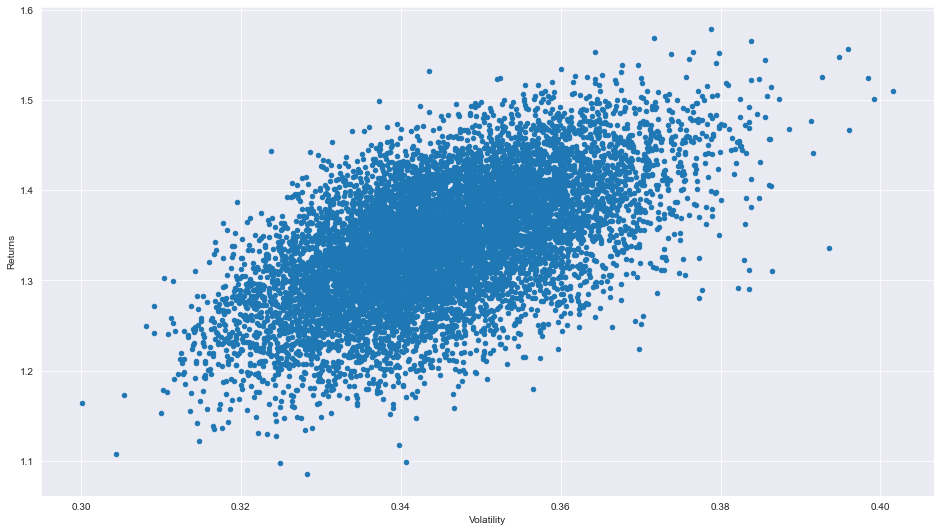

In [38]:
#Plotting the efficient frontier
ports = pd.DataFrame({'Returns': p_ret, 'Volatility': p_vol})
ports.plot(x='Volatility', y='Returns', kind = 'scatter', figsize = (16, 9))

In [39]:
SR_idx = np.argmax(p_SR)    #finding the maximum Sharpe ratio among all the combinations
i = 0
investment = {}
for i in range (21):
    #printing the sector, stock, and investment percentage
    print("Stock : {} -> {:2.2%}".format(top_companies[i], (p_wt[SR_idx][i])))
    investment[top_companies[i]] = (p_wt[SR_idx][i])
#printing volatility and returns of that combination
print('Volatility : ', p_vol[SR_idx])
print('Returns : ',p_ret[SR_idx])

Stock : KARURVYSYA -> 2.28%
Stock : DCMSHRIRAM -> 3.50%
Stock : MAZDOCK -> 0.00%
Stock : JKLAKSHMI -> 6.85%
Stock : RAINBOW -> 6.01%
Stock : FACT -> 1.54%
Stock : ADANIENT -> 10.72%
Stock : ADANIPOWER -> 2.43%
Stock : GESHIP -> 3.19%
Stock : ATGL -> 6.85%
Stock : AWL -> 7.66%
Stock : BLS -> 11.11%
Stock : KPITTECH -> 9.73%
Stock : TVSMOTOR -> 3.32%
Stock : METROBRAND -> 8.69%
Stock : TEJASNET -> 4.44%
Stock : SWANENERGY -> 3.04%
Stock : JKPAPER -> 1.92%
Stock : RVNL -> 5.39%
Stock : RAYMOND -> 1.20%
Stock : SUNTV -> 0.14%
Volatility :  0.34348925507857303
Returns :  1.5322371263324184


In [40]:
#creating a dictionary of number of stocks bought
stocks_bought = {}
for x in top_companies:
    """
    the total investment here is adjusted such that we can buy atleast one stock for most of our 
    portfolio according to our investment plan. 100k is found to be such an amount.
    
    """
    print('{} -> {}'.format(x, round((investment[x]*100000)/top_stocks_all_industries[x].iloc[-1])))
    stocks_bought[x] = round((investment[x]*100000)/top_stocks_all_industries[x].iloc[-1])


KARURVYSYA -> 20
DCMSHRIRAM -> 4
MAZDOCK -> 0
JKLAKSHMI -> 8
RAINBOW -> 8
FACT -> 4
ADANIENT -> 3
ADANIPOWER -> 8
GESHIP -> 5
ATGL -> 2
AWL -> 12
BLS -> 67
KPITTECH -> 14
TVSMOTOR -> 3
METROBRAND -> 10
TEJASNET -> 8
SWANENERGY -> 10
JKPAPER -> 5
RVNL -> 81
RAYMOND -> 1
SUNTV -> 0


In [41]:
#exact total cost of the portfolio
total_cost = 0
for x in top_companies:
    total_cost += stocks_bought[x]*top_stocks_all_industries[x].iloc[-1]
total_cost

101326.6919555664

In [21]:
#the market index i.e. data of NIFTY is downloaded
save_to_csv_from_yahoo(PATH, "^NSEI", S_YEAR, S_MONTH, S_DAY, E_YEAR, E_MONTH, E_DAY)

Get data for : ^NSEI
[*********************100%***********************]  1 of 1 completed


In [22]:
#adding daily returns to the NIFTY data
add_daily_returns("^NSEI")

In [42]:
#returning the value of a portfolio on a particular date
def return_portfolio_value_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close', date, date, *tickers)
    port_prices = port_prices.values.tolist()
    port_prices = sum(port_prices, [])
    
    cost_of_components = []
    for ticker, price in zip(tickers, port_prices):
        if(math.isnan(price) == False):
            cost_of_components.append(shares[ticker]*price)
    
    return sum(cost_of_components)

In [43]:
#returns the starting price of our portfolio in the time period
s_price = return_portfolio_value_by_date(dt.datetime(2021,1,1), stocks_bought, top_companies)
#returns the last price of our portfolio in the time period
e_price = return_portfolio_value_by_date(dt.datetime(2022,12,30), stocks_bought, top_companies)

In [44]:
#getting the dataframe of NIFTY
nsei_df = get_stock_df_from_csv("^NSEI")

In [45]:
#returns the starting price of NIFTY in the time period
s_price_nifty = nsei_df['Adj Close'].loc[nsei_df.index == dt.datetime(2021,1,1)].item()
#returns the last price of NIFTY in the time period
e_price_nifty = nsei_df['Adj Close'].loc[nsei_df.index == dt.datetime(2022,12,30)].item()

In [46]:
#comparison between nifty and portfolio returns on investment
portfolio_roi = (e_price - s_price)/s_price
nifty_roi = (e_price_nifty - s_price_nifty)/s_price_nifty

print('Portfolio ROI : {:2.2%}'.format(portfolio_roi))
print('Market ROI : {:2.2%}'.format(nifty_roi))

Portfolio ROI : 430.59%
Market ROI : 29.15%


In [47]:
#this fetches the daily_return of total portfolio
def get_portfolio_daily_return(sdate, edate, shares, tickers):
    mult_df = merge_df_by_column_name('Adj Close', sdate, edate, *tickers)
    num_cols = len(mult_df.columns)
    i=0
    while i < num_cols:
        mult_df[tickers[i]] = mult_df[tickers[i]].apply(lambda x:x * shares[tickers[i]])
        i += 1
    mult_df['Total'] = mult_df.iloc[:, 0:num_cols].sum(axis=1)
    mult_df['daily_return'] = (mult_df['Total']/mult_df['Total'].shift(1)) - 1
    return mult_df

In [48]:
#storing the data of daily_return in a dataframe
total_portfolio_df = get_portfolio_daily_return(dt.datetime(2022,1,1), dt.datetime(2023,1,1), stocks_bought, top_companies)
total_portfolio_df

,KARURVYSYA,DCMSHRIRAM,MAZDOCK,JKLAKSHMI,RAINBOW,FACT,ADANIENT,ADANIPOWER,GESHIP,ATGL,...,TVSMOTOR,METROBRAND,TEJASNET,SWANENERGY,JKPAPER,RVNL,RAYMOND,SUNTV,Total,daily_return
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,892.744217,3799.410645,0.0,4625.156738,NaN,522.799988,5149.261230,810.400024,1421.349030,3487.273682,...,1866.913330,4505.166931,3415.600098,1460.886688,1006.205673,2650.817574,613.166748,0.0,47827.942833,NaN
2022-01-04,890.811768,4147.428711,0.0,4767.207520,NaN,546.000000,5154.808594,804.400024,1411.468964,3507.571533,...,1870.473633,4336.322632,3400.000000,1455.389252,1015.730362,2647.062721,625.974243,0.0,48187.255512,0.007513
2022-01-05,890.811768,3993.689941,0.0,4863.753906,NaN,540.400024,5144.163208,798.799988,1392.884369,3543.068359,...,1894.950623,4368.601685,3441.199951,1478.379364,1035.024109,2617.025139,627.867981,0.0,48027.543621,-0.003314
2022-01-06,890.811768,3876.378418,0.0,4866.523926,NaN,541.799988,5137.116211,798.799988,1414.762421,3596.663330,...,1925.212830,4521.058044,3407.600098,1625.817566,1020.859070,2647.062721,632.801636,0.0,48960.234039,0.019420
2022-01-07,898.541183,3910.455322,0.0,4931.020508,NaN,528.599976,5095.134155,801.599976,1438.522034,3575.265381,...,1901.922729,4650.670776,3405.199951,1642.310638,1029.651184,2677.100304,637.436218,0.0,50467.968998,0.030795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2173.000031,3337.837891,0.0,6369.600098,5632.000000,1069.199951,11150.250000,2202.399902,3242.587891,6623.399902,...,3031.691162,8333.348389,4484.399902,2866.499939,1945.373840,5038.255062,1451.250000,0.0,96539.207439,0.036426
2022-12-27,2181.000061,3407.963867,0.0,6421.200195,5753.600098,1176.000000,11308.949707,2312.399902,3317.679443,6705.799805,...,3116.771484,8396.649780,4616.000000,2801.000061,1995.610657,5026.391064,1420.199951,0.0,97943.956554,0.014551
2022-12-28,2165.000000,3436.570557,0.0,6391.600098,5924.000000,1293.599976,11393.099854,2428.000000,3215.525818,7211.600098,...,3232.151733,8581.569214,4630.000000,2852.000122,2018.872986,5275.535339,1442.150024,0.0,99643.550003,0.017353


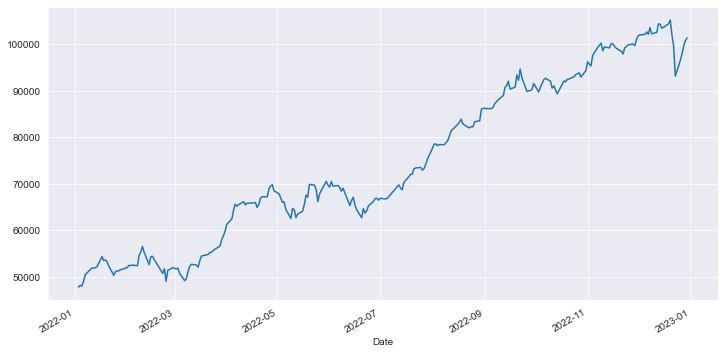

In [49]:
#plotting the total value of the portfolio
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = total_portfolio_df['Total'].plot(ax=ax)

In [50]:
#function finds the beta of the portfolio with respect to the market
def find_portfolio_beta(port_df, sdate, edate):
    mult_df = pd.DataFrame()
    port_mask = (port_df.index >= sdate) & (port_df.index <= edate)
    nifty_df = pd.read_csv('D:\Python\\Stocks_IND\\^NSEI.csv', index_col = 'Date', parse_dates = True)
    nifty_mask = (nifty_df.index >= sdate) & (nifty_df.index <= edate)
    mult_df['NSEI'] = nifty_df.loc[nifty_mask]['daily_return']
    mult_df['Portfolio'] = port_df.loc[port_mask]['daily_return']
    
    cov = mult_df.cov() * 248 * 2
    cov_vs_market = cov.iloc[0,1]
    nifty_var = mult_df['NSEI'].var()* 248 * 2
    return cov_vs_market/nifty_var

In [51]:
#returns the beta of the portfolio with respect to the market
beta_portfolio = find_portfolio_beta(total_portfolio_df, dt.datetime(2022,1,1), dt.datetime(2023,1,1))
beta_portfolio

1.0729112683973168

In [52]:
risk_free_rate = (0.0698)*2
port_alpha = portfolio_roi - risk_free_rate - (beta_portfolio * (nifty_roi - risk_free_rate))
port_alpha

4.00328292321638

In [53]:
total_portfolio_df = total_portfolio_df.asfreq('d', method = 'ffill')
total_portfolio_df.fillna(method = 'ffill')
total_portfolio_df['daily_return'].iloc[0] = 0

for x in top_companies:
    total_portfolio_df.drop([x], axis = 1, inplace = True)
total_portfolio_df.drop(['daily_return'], axis=1, inplace=True)

In [54]:
lags = ar_select_order(total_portfolio_df, maxlag = 30)
model = AutoReg(total_portfolio_df['Total'], lags.ar_lags)
model_fit = model.fit()

len(total_portfolio_df)

362

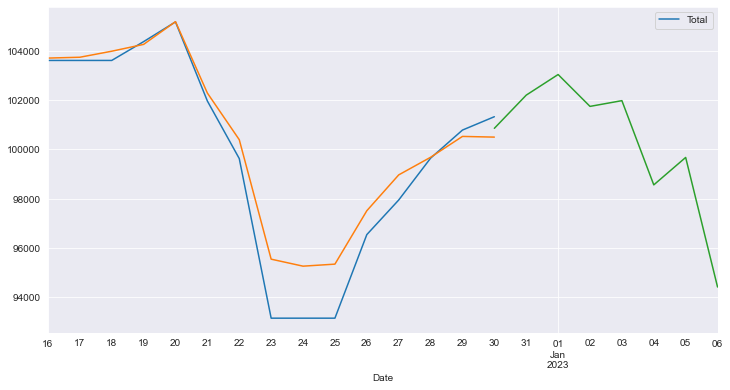

In [55]:
train_df = total_portfolio_df.iloc[:347]
test_df = total_portfolio_df.iloc[347:]

train_model = AutoReg(total_portfolio_df['Total'], 160).fit(cov_type='HC0')
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start = start, end = end, dynamic = True)

sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)

forecast = train_model.predict(start = end, end = end + 7, dynamic = True)
ax = forecast.plot(ax=ax)

In [59]:
#Downloading and storing portfolio data for the next 7 days as forecasted 
PATH = "D:\Python\Stocks_IND_Port\\"
for x in top_companies:
    save_to_csv_from_yahoo(PATH, x + ".NS", 2022, 12, 30, 2023, 1, 7)

Get data for : KARURVYSYA.NS
[*********************100%***********************]  1 of 1 completed
Get data for : DCMSHRIRAM.NS
[*********************100%***********************]  1 of 1 completed
Get data for : MAZDOCK.NS
[*********************100%***********************]  1 of 1 completed
Get data for : JKLAKSHMI.NS
[*********************100%***********************]  1 of 1 completed
Get data for : RAINBOW.NS
[*********************100%***********************]  1 of 1 completed
Get data for : FACT.NS
[*********************100%***********************]  1 of 1 completed
Get data for : ADANIENT.NS
[*********************100%***********************]  1 of 1 completed
Get data for : ADANIPOWER.NS
[*********************100%***********************]  1 of 1 completed
Get data for : GESHIP.NS
[*********************100%***********************]  1 of 1 completed
Get data for : ATGL.NS
[*********************100%***********************]  1 of 1 completed
Get data for : AWL.NS
[*********************1

In [56]:
#modifying the data to find total value of the portfolio
def get_portfolio_total(*tickers):
    mult_df = pd.DataFrame()
    for x in tickers:
        try:
            df = pd.read_csv('D:\Python\Stocks_IND_Port\\' + x + '.NS.csv', index_col = 'Date', parse_dates = True)
        except FileNotFoundError:
            not_found.append(company)
            print('FileNotFoundError')
            continue;
        else:
            mult_df[x] = df['Adj Close']
    num_cols = len(mult_df.columns)
    i=0
    while i < num_cols:
        mult_df[tickers[i]] = mult_df[tickers[i]].apply(lambda x:x * stocks_bought[tickers[i]])
        i += 1
    mult_df['Total'] = mult_df.iloc[:, 0:num_cols].sum(axis=1)
    return mult_df

total_portfolio_future_df = get_portfolio_total(*top_companies)
total_portfolio_future_df

,KARURVYSYA,DCMSHRIRAM,MAZDOCK,JKLAKSHMI,RAINBOW,FACT,ADANIENT,ADANIPOWER,GESHIP,ATGL,...,KPITTECH,TVSMOTOR,METROBRAND,TEJASNET,SWANENERGY,JKPAPER,RVNL,RAYMOND,SUNTV,Total
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,2265.000000,3571.458740,0.0,6530.799805,5913.600098,1493.400024,11575.050293,2396.399902,3271.356812,7385.700195,...,9842.006836,3240.212402,8807.360840,4626.799805,3059.500122,2024.812317,5398.130402,1470.699951,0.0,101326.691956
2023-01-02,2211.999969,3570.068115,0.0,6362.000000,5988.399902,1418.800049,11523.599854,2385.199951,3297.931213,7101.200195,...,9737.193115,3203.344482,8631.911621,4851.200195,3107.500000,2067.129822,5421.858398,1499.449951,0.0,101139.754013
2023-01-03,2240.000000,3552.983643,0.0,6296.399902,6232.799805,1348.000000,11492.849854,2358.000000,3227.472229,7197.299805,...,9667.317017,3109.308472,8703.685913,4814.399902,3296.499939,2058.963318,5690.775902,1495.099976,0.0,101442.238792
2023-01-04,2221.999969,3506.895264,0.0,6248.000000,6233.200195,1415.400024,11481.150146,2292.800049,3239.906006,6954.600098,...,9519.180542,3060.051453,8537.208862,4750.399902,3233.500061,2046.589813,5805.462044,1463.599976,0.0,100405.443703
2023-01-05,2225.000000,3480.871094,0.0,6193.600098,6180.799805,1486.000000,11489.400146,2310.000000,3167.252502,7267.399902,...,9540.841919,3075.425171,8692.222290,4722.799805,3222.000122,2061.932983,5698.686058,1479.400024,0.0,100554.311714
2023-01-06,2201.000061,3521.595703,0.0,6091.200195,6064.000000,1411.800049,11472.750000,2267.199951,3159.207153,7110.799805,...,10015.298706,3058.409363,8602.504272,4658.799805,3108.500061,2034.711151,5730.322975,1445.550049,0.0,100120.407784


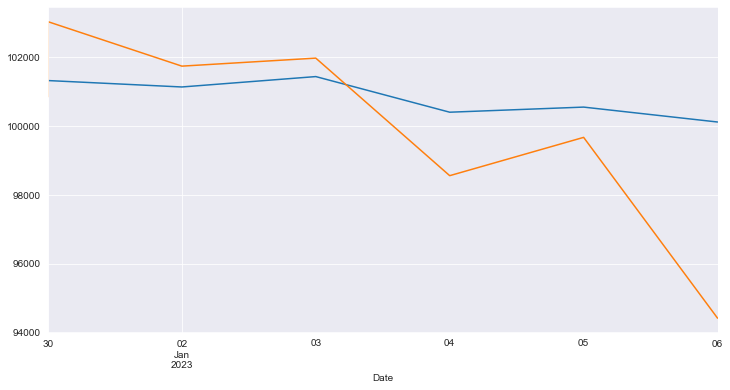

In [57]:
#plotting the portfolio data downloaded and the forecasted data
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = total_portfolio_future_df['Total'].plot(ax=ax)
ax = forecast.plot(ax=ax)